In [1]:
import random
import math
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#log2

def nextpower0(x):
  y = x
  i = 0
  while y > 1:
    y /= 2
    i += 1
  return int(2**i)

def nextpower1(x):
  i = 0
  while 2**i < x:
    i += 1 
  return int(2**i)

In [3]:
x0 = 2**12
x1 = 2**12 + 1

In [4]:
%time nextpower0(x0)

Wall time: 0 ns


4096

In [5]:
%time nextpower1(x0)

Wall time: 0 ns


4096

In [6]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

cfilorux = alphabet[2:-1:3]
print(cfilorux)

cfilorux


In [7]:
#On suppose un arrondi attendu plutôt qu'une troncature
pi9 = np.round(np.pi, 9)
print(pi9)

3.141592654


In [8]:
s = "HelLo WorLd!!"
dict4 = {}
for char in s:
  if char in dict4.keys():
    dict4[char] += 1
  else:
    dict4[char] = 1
print(dict4)

{'H': 1, 'e': 1, 'l': 1, 'L': 2, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 2}


In [9]:
alphabet_copy = list(alphabet)
random.shuffle(alphabet_copy)
dicodage = {k:v for k,v in zip(alphabet, alphabet_copy)}
print(dicodage)

{'a': 'y', 'b': 'l', 'c': 't', 'd': 'i', 'e': 'h', 'f': 'r', 'g': 'p', 'h': 's', 'i': 'u', 'j': 'm', 'k': 'w', 'l': 'e', 'm': 'c', 'n': 'a', 'o': 'g', 'p': 'v', 'q': 'j', 'r': 'n', 's': 'b', 't': 'f', 'u': 'x', 'v': 'k', 'w': 'o', 'x': 'q', 'y': 'd', 'z': 'z'}


In [54]:
%%time
newprod = 2
prod = -1
for i in range(1,10**6):
    newprod *= (4*(i**2)/(4*(i**2)-1)) #éviter double calcul
    if np.abs(newprod-prod)<10**-10:
        prod = newprod
        break
    prod = newprod
print(prod,i)

3.1415837914137876 88623
Wall time: 220 ms


In [57]:
#+ méthode récursive

result = np.prod([(4*(i**2)/(4*(i**2)-1)) for i in range(1,10**5)])*2
result

3.141584799578707

In [55]:
%%time
prod = 2
i = 1
while np.abs(prod-prod*(4*(i**2)/(4*(i**2)-1)))>10**-10:
    prod *= (4*(i**2)/(4*(i**2)-1))
    i += 1
print(prod, i)

3.1415837913137885 88623
Wall time: 379 ms


In [12]:
def quicksort(ll):
  """ a sorting algorithm with a pivot value"""
  if len(ll) <= 1:
    return ll
  else:
    pivot = ll.pop(-1)
    less = []
    greater = []
    for x in ll:
      if x <= pivot:
        less.append(x)
      else:
        greater.append(x)
    return quicksort(less) + [pivot] + quicksort(greater)

quicksort([-2, 3, 5, 1, 3])

[-2, 1, 3, 3, 5]

In [13]:
M = np.random.uniform(-1,1,(5,6))
M[:, 1:-1:2] = M[:, 1:-1:2] - 2*M[:, 2:-1:2]
M[M<0] = 0
M

array([[0.        , 0.        , 0.08546578, 0.        , 0.        ,
        0.48772112],
       [0.        , 0.        , 0.47425475, 0.1698037 , 0.11119635,
        0.96430439],
       [0.        , 0.64887724, 0.        , 2.22324902, 0.        ,
        0.12161253],
       [0.22994089, 0.        , 0.78668226, 0.        , 0.96607379,
        0.78434607],
       [0.47317446, 0.        , 0.75942524, 0.61921259, 0.        ,
        0.75659469]])

In [116]:
M = np.random.uniform(-1,1,(5,20))
G = M.T@M
print(np.allclose(G,G.T))
print(np.all(np.linalg.eigvals(G)>0))
print(len(np.linalg.eigvals(G)[(~np.iscomplex(np.linalg.eigvals(G)) & (~np.isclose(0,np.linalg.eigvals(G))))])) #> python précision
print(np.linalg.matrix_rank(G))

True
False
5
5


In [69]:
df = pd.read_csv("GaltonsHeightData.csv")
df["Height"] = df["Height"].apply(lambda x: np.round(x*2.54, 0))
df["Father"] = df["Father"].apply(lambda x: np.round(x*2.54, 0))
df["Mother"] = df["Mother"].apply(lambda x: np.round(x*2.54, 0))
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.0,170.0,M,186.0,4
1,1,199.0,170.0,F,176.0,4
2,1,199.0,170.0,F,175.0,4
3,1,199.0,170.0,F,175.0,4
4,2,192.0,169.0,M,187.0,4


In [70]:
df.isna().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

<AxesSubplot:xlabel='Father', ylabel='Density'>

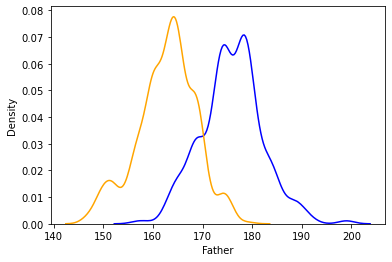

In [71]:
import seaborn as sns

sns.kdeplot(df["Father"], color="blue")
sns.kdeplot(df["Mother"], color="orange")

C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


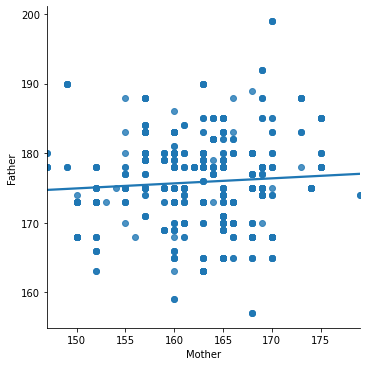

In [72]:
sns.lmplot("Mother","Father",data=df,ci=None) #add R2

<AxesSubplot:xlabel='Kids', ylabel='Count'>

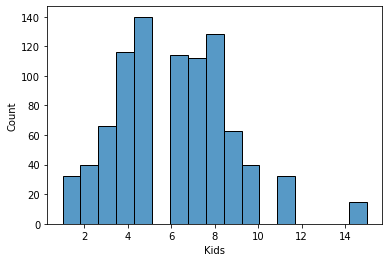

In [73]:
sns.histplot(df["Kids"])

In [74]:
df["MidParents"] = (df["Father"] + 1.08 * df["Mother"])/2

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df["MidParents"].values.reshape(-1,1),df["Height"])

print(model.coef_[0], model.intercept_)

0.6330937666628673 58.255916588003544


In [76]:
x = df["MidParents"].values
y = df["Height"].values
xbar = x.mean()
ybar = y.mean()

theta1 = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
theta0 = ybar - theta1 * xbar

print(theta1, theta0)

0.6330937666628673 58.255916588003544


C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MidParents', ylabel='Height'>

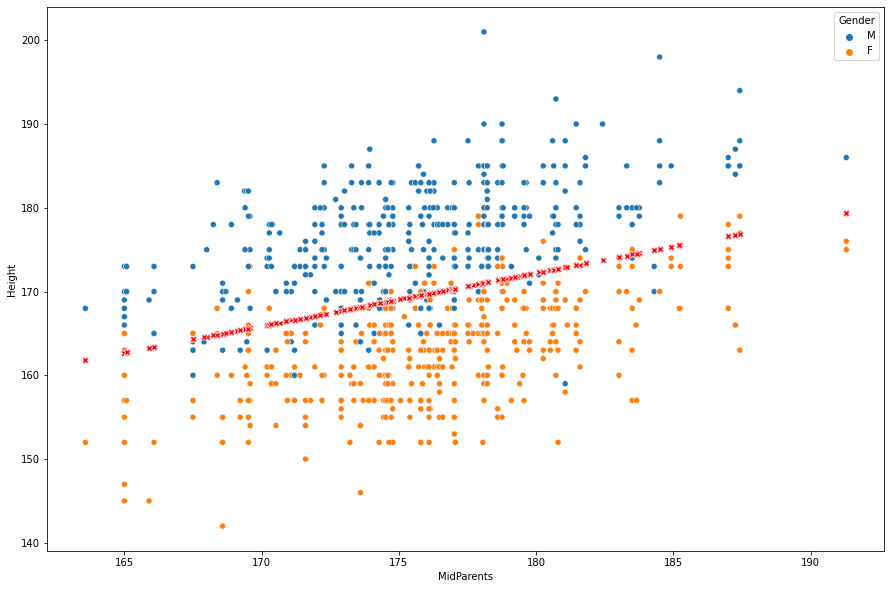

In [77]:
df["Predictions"] = model.predict(df["MidParents"].values.reshape(-1,1))

plt.figure(figsize = (15,10))
sns.scatterplot("MidParents", "Height", data=df, hue = "Gender")
sns.scatterplot("MidParents", "Predictions", data=df, color = "red", marker = "X", legend = None)

<AxesSubplot:>

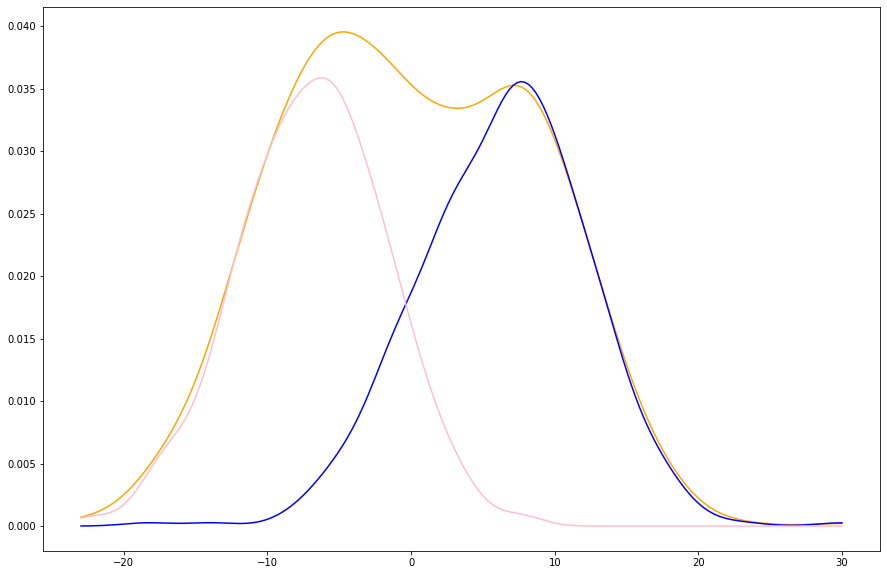

In [97]:
import scipy.stats

x = np.linspace(min(df["Residuals"]),max(df["Residuals"]),200)

df["Residuals"] = df["Height"] - df["Predictions"]
plt.figure(figsize = (15,10))
sns.lineplot(x=x,y=scipy.stats.gaussian_kde(df["Residuals"])(x), color="orange")
sns.lineplot(x=x,y=scipy.stats.gaussian_kde(df["Residuals"][df["Gender"]=="M"])(x)*sum(df["Gender"]=="M")/len(df), color="blue")
sns.lineplot(x=x,y=scipy.stats.gaussian_kde(df["Residuals"][df["Gender"]=="F"])(x)*sum(df["Gender"]=="F")/len(df), color="pink")

In [63]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv("https://perso.telecom-paristech.fr/sabourin/mdi720/household_power_consumption.txt", sep = ";", na_values="?")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [64]:
df = df[["Date", "Global_active_power", "Sub_metering_1"]]
df.isna().sum()

Date                       0
Global_active_power    25979
Sub_metering_1         25979
dtype: int64

In [65]:
df["Global_active_power"] = df["Global_active_power"].astype(float)

In [66]:
df["Sub_metering_1"] = df["Sub_metering_1"].astype(float) * 0.06
df.head()

,Date,Global_active_power,Sub_metering_1
0,16/12/2006,4.216,0.0
1,16/12/2006,5.360,0.0
2,16/12/2006,5.374,0.0
3,16/12/2006,5.388,0.0
4,16/12/2006,3.666,0.0


In [67]:
df["Date"] = pd.to_datetime(df["Date"])
df_mean = df.groupby("Date").mean()
df_mean

,Global_active_power,Sub_metering_1
Date,,
2006-12-16,3.053475,0.000000
2006-12-17,2.354486,0.084708
2006-12-18,1.530435,0.044292
2006-12-19,1.157079,0.034958
2006-12-20,1.545658,0.000000
...,...,...
2010-12-07,0.770538,0.071833
2010-12-08,0.367846,0.000000
2010-12-09,1.119508,0.075208


C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Global_active_power'>

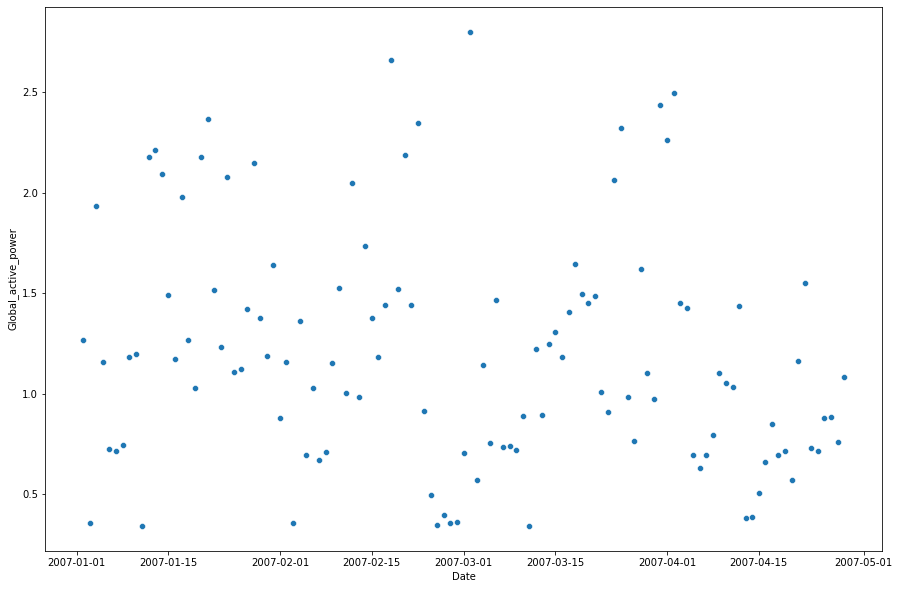

In [30]:
df_mean_r = df_mean[(df_mean.index < "04-30-2007") & (df_mean.index > "01-01-2007")]

plt.figure(figsize = (15,10))
sns.scatterplot(df_mean_r.index, df_mean_r["Global_active_power"])

In [31]:
df_temp = pd.read_csv("https://perso.telecom-paristech.fr/sabourin/mdi720/TG_STAID011249.txt", comment = "#")
df_temp.columns = df_temp.columns.str.strip()
df_temp = df_temp[["DATE","TG"]]
df_temp.head()

,DATE,TG
0,19210301,50
1,19210302,46
2,19210303,46
3,19210304,31
4,19210305,95


In [32]:
df_temp["TG"] = df_temp["TG"]/10

In [33]:
df_temp["DATE"] = pd.to_datetime(df_temp["DATE"], format="%Y%m%d")
df_temp.head()

,DATE,TG
0,1921-03-01,5.0
1,1921-03-02,4.6
2,1921-03-03,4.6
3,1921-03-04,3.1
4,1921-03-05,9.5


C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\phile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Global_active_power'>

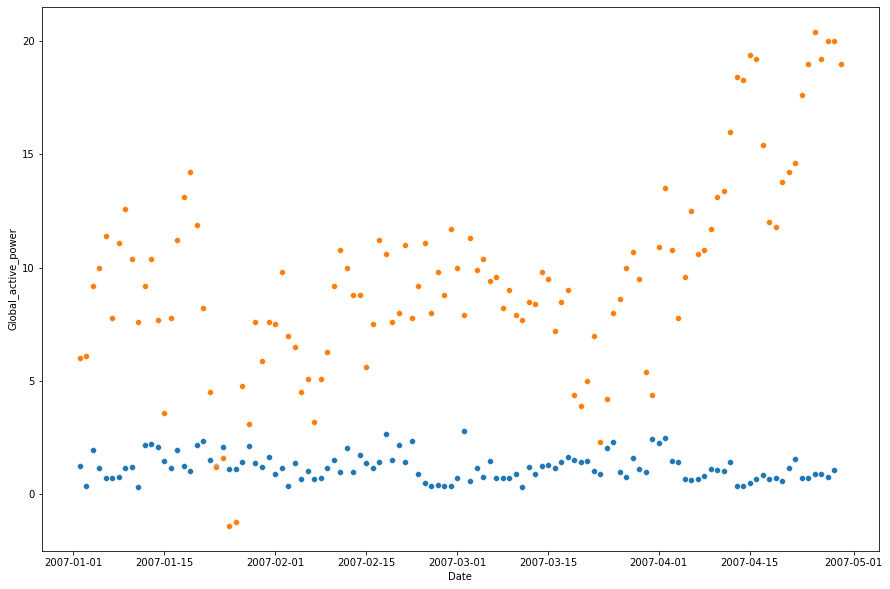

In [34]:
df_temp_r = df_temp[(df_temp["DATE"] < "04-30-2007") & (df_temp["DATE"] > "01-01-2007")]

plt.figure(figsize = (15,10))
sns.scatterplot(df_mean_r.index, df_mean_r["Global_active_power"])
sns.scatterplot(df_temp_r["DATE"], df_temp_r["TG"])